Assessing the stability of the model:


Calculate the pathways that vary the most in our output

In [1]:
import analyze
from analyze import Posterior
posteriors = [Posterior('results/' + str(i) + '.csv') for i in range(5, 9)] 
all_paths, top_ranges = analyze.compare_pathway_probs(posteriors, threshold = 0.3)  

top ranges
p_cge00052 1.04477111372
p_cge00350 0.947202962836
p_cge00600 0.90600750227
p_cge00620 0.879708516499
p_cge00051 0.872280588998
p_cge00561 0.860113476
p_cge00480 0.792465959333
p_cge00010 0.715613718352
p_cge00520 0.708425229639
p_cge00790 0.670708005385
p_cge00330 0.652195691343
p_cge00340 0.632007327836
p_cge00410 0.623700202187
p_cge00510 0.559656961935
p_cge00071 0.537958755828
p_cge00062 0.529684909975
p_cge00970 0.525668342513
p_cge00130 0.524753460009
p_cge00630 0.520679867098
p_cge00061 0.51820075274
p_cge00450 0.510525794065
p_cge00785 0.508792822748
p_cge00053 0.494126794346
p_cge00310 0.486961546452
p_cge00860 0.485953008236
p_cge01200 0.485227784221
p_cge00072 0.482665957108
p_cge00220 0.455150285202
p_cge01230 0.43149202138
p_cge00562 0.319138810928


The above shows all pathways in our model with a range greater than 0.5 between 4 runs of the sampler.

Lets see what metabolites occur most often in this set of pathways

In [2]:
import structure_analysis as sa
from operator import itemgetter
top_range_set = set(zip(*top_ranges)[0])
DG, pathways, mets = sa.create_metabolite_graph(top_range_set)
degree2mets, degree2edges, common_mets = sa.find_common_mets(DG, mets)      
print "Common metabolites"
for met, degree in sorted(common_mets, key=itemgetter(1), reverse=True):
    print met, degree

Common metabolites
C00122 5
C00062 5
C00267 5
C00159 4
C00073 4
C00135 4
C00042 4
C00311 4
C00158 3
C01179 3
C00137 3
C00191 3
C00249 3
C00116 2
C00095 2
C00270 2
C00109 2
C00794 2
C00186 2
C03406 2


Interesting... Lets plot the bipartite graph to see where things might be affecting each other

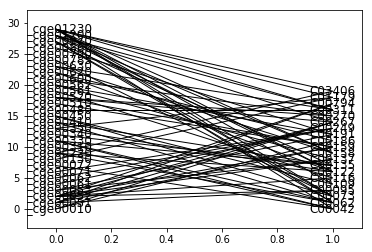

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
n_paths, n_mets = len(pathways), len(degree2mets)
pos = dict(zip(sorted(pathways),zip([0]*n_paths, range(n_paths))))
pos.update(dict(zip(sorted(degree2mets), zip([1] * n_mets, range(n_mets)))))
common_G = DG.subgraph(set(degree2mets) | pathways).to_undirected()
nx.draw_networkx(common_G, pos, with_labels=True, node_size=0)
plt.show()

In [4]:
met = 'C00116'
paths = common_G.neighbors(met)
all_paths, all_mets = analyze.construct_union(posteriors)
for p in paths:
    print p.strip(), all_paths[p]
met, all_mets['g_' + met]


p_cge00052 [0.0350541053432, 0.905563908246, 0.0486663643996, 1.07982521906]
p_cge00561 [0.900269167635, 0.634386867709, 0.0401556916348, 0.627014039379]


('C00116', [])

Weird... The first few mets I tried seem to be observed

In [5]:
metlin, hmdb, metfrag = analyze.get_metabolite_sets()
observed = metlin | hmdb | metfrag
for met in common_mets:
    print met, met[0] in observed

('C00159', 4) True
('C00158', 3) True
('C00122', 5) True
('C00116', 2) True
('C00095', 2) True
('C01179', 3) True
('C00137', 3) True
('C00073', 4) True
('C00135', 4) True
('C00062', 5) True
('C00270', 2) True
('C00109', 2) True
('C00042', 4) True
('C00311', 4) True
('C00794', 2) True
('C00191', 3) True
('C00186', 2) True
('C00267', 5) True
('C03406', 2) True
('C00249', 3) True


This is definitly not a coincidence